In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
file_1 = pd.read_csv('resources/demographic.csv')
file_2 = pd.read_csv('resources/diet.csv')
file_3 = pd.read_csv('resources/examination.csv')
file_4 = pd.read_csv('resources/labs.csv')
file_5 = pd.read_csv('resources/medications.csv', encoding = "ISO-8859-1")
file_6 = pd.read_csv('resources/questionnaire.csv')

In [7]:
df_1 = pd.DataFrame(file_1)
df_2 = pd.DataFrame(file_2)
df_3 = pd.DataFrame(file_3)
df_4 = pd.DataFrame(file_4)
df_5 = pd.DataFrame(file_5)
df_6 = pd.DataFrame(file_6)

dataframes = [df_1,df_2,df_3,df_4,df_5,df_6]

In [8]:
merged=reduce(lambda left,right: pd.merge(left, right, on='SEQN', how='inner'), dataframes)
merged.dropna(how='all', axis=1)
merged.dropna(how='all', axis=0)
print('columns: ' + str(len(merged.columns.tolist())))
print('rows: ' + str(len(merged.index)))

columns: 1824
rows: 19580


In [22]:
df_clean = merged.loc[:,['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3','DMDEDUC3','DMDEDUC2','INDHHIN2','BMXWAIST','MGDCGSZ','BMXBMI','BMXARMC','BMDBMIC','BPXPLS','LBXGH']]
#Combining children and adult education
df_clean['DMDEDUC3'].fillna(0, inplace=True)
df_clean['DMDEDUC2'].fillna(0, inplace=True)
df_clean['DMDEDUC'] = df_clean['DMDEDUC2'] + df_clean['DMDEDUC3']
df_clean = df_clean.drop(['DMDEDUC3'], axis=1).drop(['DMDEDUC2'], axis=1)

#combining children and adult BMI
df_clean['BMXBMI'].fillna(0, inplace=True)
df_clean['BMDBMIC'].fillna(0, inplace=True)
df_clean['bmi'] = df_clean['BMXBMI'] + df_clean['BMDBMIC']
df_clean = df_clean.drop(['BMXBMI'], axis=1).drop(['BMDBMIC'], axis=1)

df_clean = df_clean.rename(columns ={
    'SEQN': 'seqn',
    'RIAGENDR': 'gender',
    'RIDAGEYR': 'age',
    'RIDRETH3': 'ethnicity',
    'DMDEDUC': 'education',
    'INDHHIN2': 'household_income',
    'BMXWAIST': 'waist_circumference',
    'MGDCGSZ': 'grip',
    'bmi': 'bmi',
    'BMXARMC': 'arm_circumference',
    'BPXPLS': 'pulse_60s',
    'LBXGH': 'glycohemoglobin'
})
df_clean.describe()

,seqn,gender,age,ethnicity,household_income,waist_circumference,grip,arm_circumference,pulse_60s,glycohemoglobin,education,bmi
count,19580.000000,19580.000000,19580.000000,19580.000000,19362.000000,17448.000000,16075.000000,18328.000000,16748.000000,15752.000000,19580.000000,19580.000000
mean,78544.159704,1.534627,45.443565,3.260572,10.247237,96.306345,61.888734,30.929801,73.614163,5.986091,3.575128,27.392942
std,2935.456571,0.498812,25.559836,1.447386,13.376386,22.684470,23.086835,7.546291,12.598325,1.238664,2.919249,10.336352
min,73557.000000,1.000000,0.000000,1.000000,1.000000,40.200000,8.000000,10.400000,40.000000,3.500000,0.000000,0.000000
25%,75978.000000,1.000000,20.000000,3.000000,5.000000,82.400000,46.000000,26.800000,64.000000,5.300000,2.000000,22.300000
50%,78503.000000,2.000000,52.000000,3.000000,7.000000,97.500000,59.000000,31.600000,72.000000,5.600000,4.000000,27.300000
75%,81063.000000,2.000000,67.000000,4.000000,14.000000,110.500000,77.200000,35.700000,82.000000,6.200000,5.000000,32.900000
max,83731.000000,2.000000,80.000000,7.000000,99.000000,177.900000,162.800000,59.400000,180.000000,17.500000,99.000000,82.900000


In [23]:
# # sklearn.feature_selection.f_classif
# from sklearn.feature_selection import VarianceThreshold
# fs = VarianceThreshold(threshold=(.8 * (1 - .8)))
# fs.fit_transform(df_clean)
df_clean.head(n=20)

,seqn,gender,age,ethnicity,household_income,waist_circumference,grip,arm_circumference,pulse_60s,glycohemoglobin,education,bmi
0,73557,1,69,4,4.0,100.0,55.2,35.3,86.0,13.9,3.0,26.7
1,73557,1,69,4,4.0,100.0,55.2,35.3,86.0,13.9,3.0,26.7
2,73558,1,54,3,7.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6
3,73558,1,54,3,7.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6
4,73558,1,54,3,7.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6
5,73558,1,54,3,7.0,107.6,61.5,34.7,74.0,9.1,3.0,28.6
6,73559,1,72,3,10.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9
7,73559,1,72,3,10.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9
8,73559,1,72,3,10.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9
9,73559,1,72,3,10.0,109.2,91.0,33.5,68.0,8.9,4.0,28.9


In [24]:
# defining diabetes

conditions = [
    (df_clean['glycohemoglobin'] < 5.7),
    (df_clean['glycohemoglobin'] >= 5.7) & (df_clean['glycohemoglobin']<=6.4),
    (df_clean['glycohemoglobin']>6.4)
]

diagnosis = [0,1,2]

df_clean['diabetes'] = np.select(conditions, diagnosis)

# changing gender to 1 = male 0 = female
df_clean['gender'] = df_clean['gender'].apply(lambda x: x if x==1 else 0)
# replacing BMI = 0 with median
df_clean['bmi'] = df_clean['bmi'].apply(lambda x: df_clean['bmi'].median() if x==0 else x)

# time in the US = 0 if n/a
df_clean['time_us'] = df_clean['time_us'].fillna(0)

# Replacing all other nulls with median values 
df_clean['household_income'] = df_clean['household_income'].fillna(df_clean['household_income'].median())
df_clean['abdomen_diameter'] = df_clean['abdomen_diameter'].fillna(df_clean['abdomen_diameter'].median())
df_clean['waist_circumference'] = df_clean['waist_circumference'].fillna(df_clean['waist_circumference'].median())
df_clean['grip'] = df_clean['grip'].fillna(df_clean['grip'].median())
df_clean['glycohemoglobin'] = df_clean['glycohemoglobin'].fillna(df_clean['glycohemoglobin'].median())
df_clean['education'] = df_clean['education'].fillna(df_clean['education'].median())

df_clean.head(n=20)

KeyError: 'time_us'

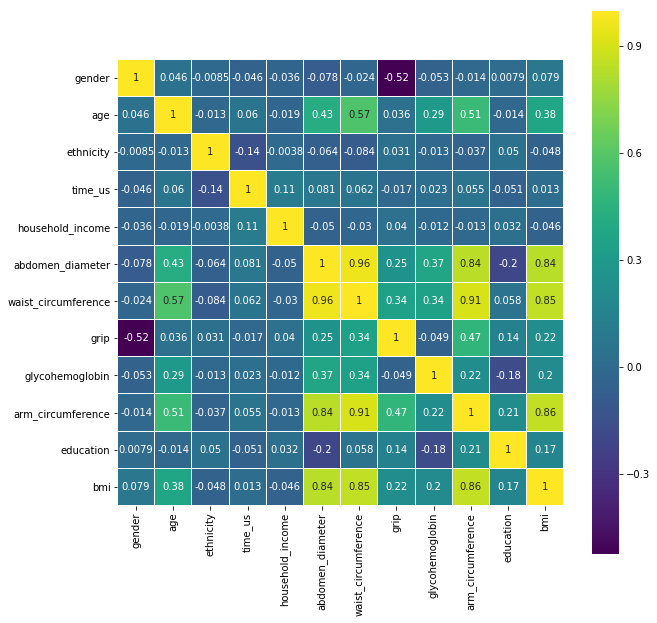

In [11]:
import seaborn as sns
cm = plt.cm.viridis
plt.figure(figsize= (10,10))
sns.heatmap(df_clean.astype(float).drop(axis=1, labels='seqn').corr(), linewidths= 0.1, vmax=1, square=True, cmap=cm, annot=True)

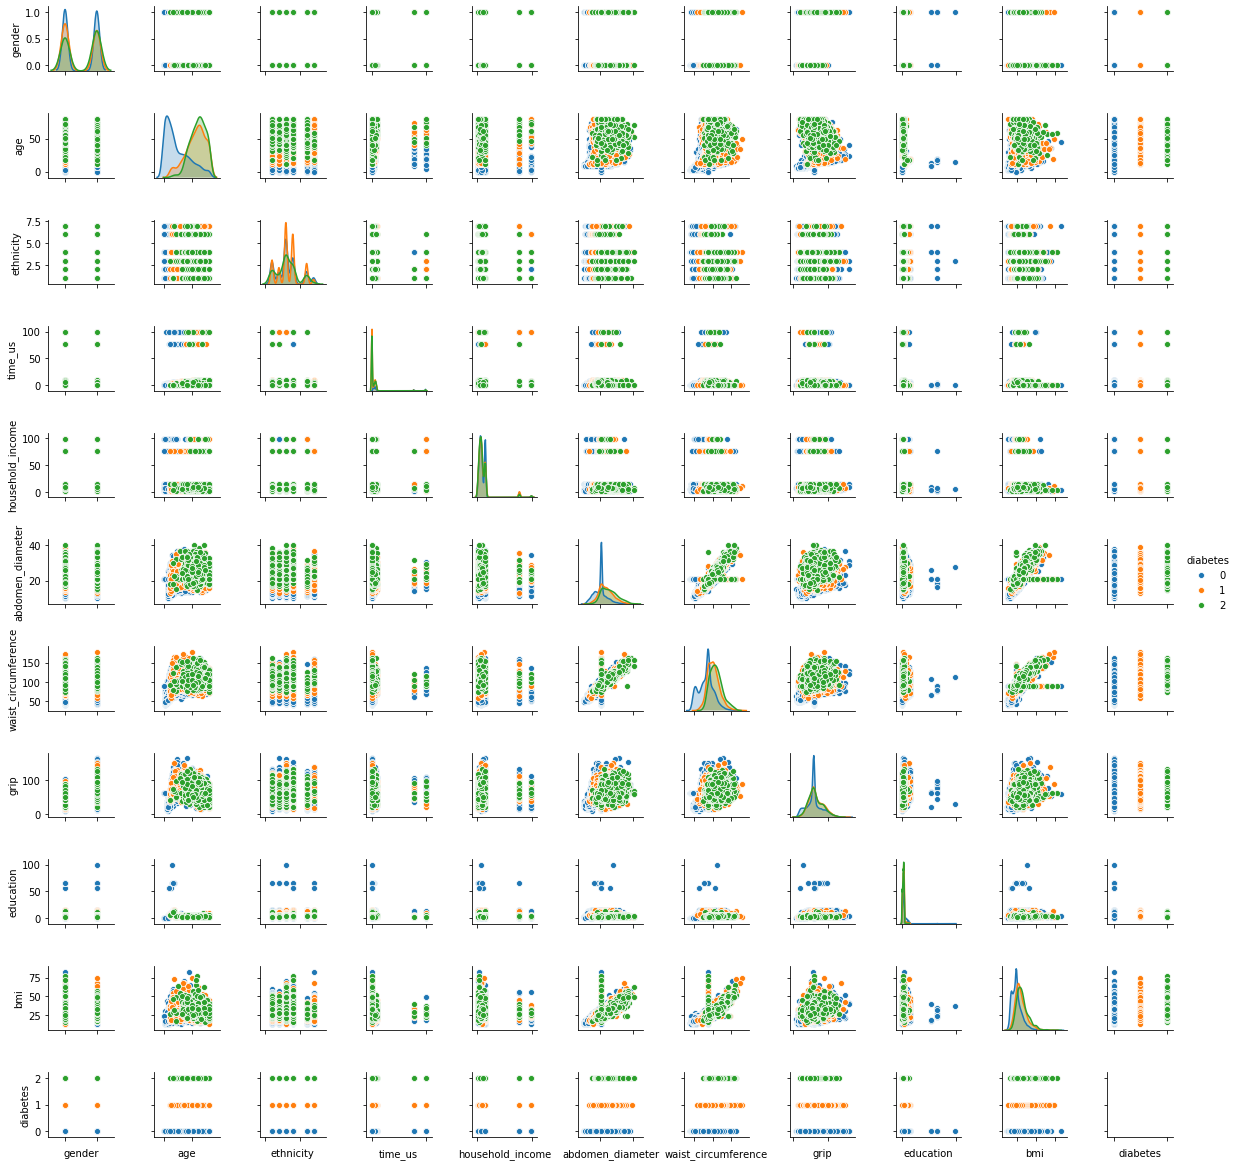

In [231]:
show = sns.pairplot(df_clean.drop(['seqn', 'glycohemoglobin'], axis=1), hue='diabetes', size=1.5, diag_kind='kde')

show.set(xticklabels=[])